## Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/preprocessed-pokemon-structured.csv')

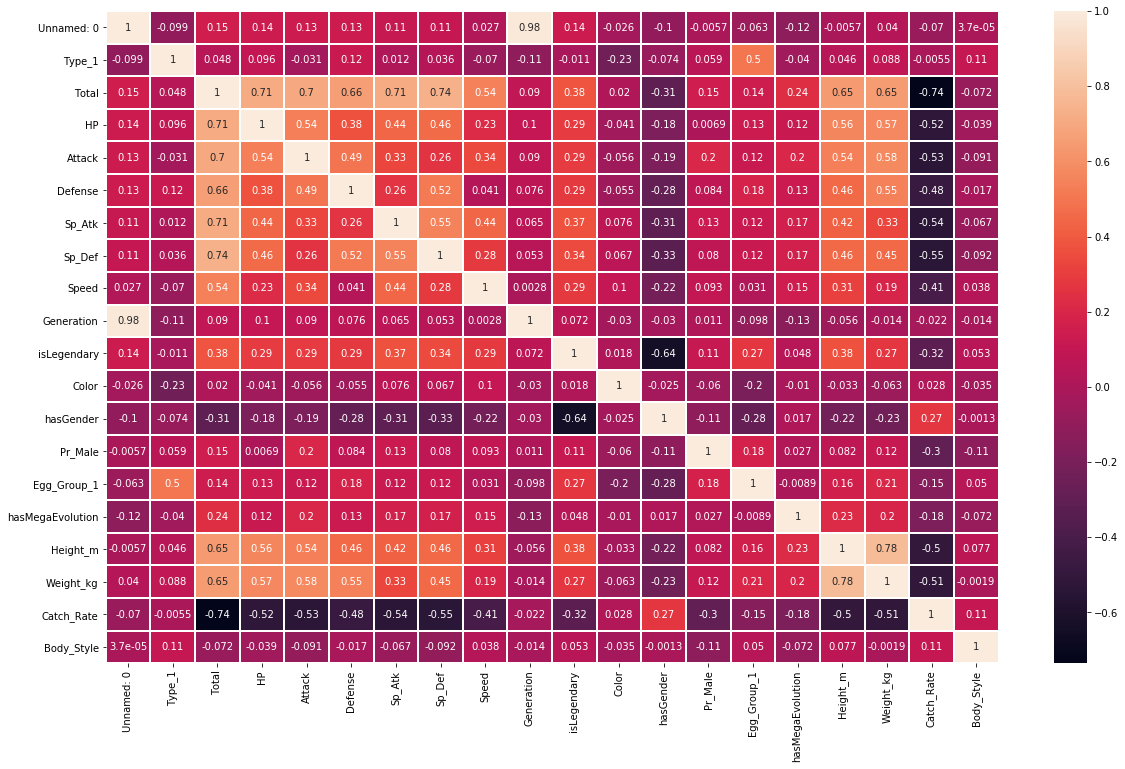

In [3]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, linewidths=1)
plt.show()

In [4]:
df = df[['Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Speed', 'Sp_Atk', 'Sp_Def', 'isLegendary', 'Egg_Group_1', 'Height_m', 'Weight_kg']]

In [5]:
df.head()

,Type_1,Total,HP,Attack,Defense,Speed,Sp_Atk,Sp_Def,isLegendary,Egg_Group_1,Height_m,Weight_kg
0,9,57,17,24,23,24,41,37,0,10,6,49
1,9,94,31,37,37,37,55,50,0,10,10,88
2,9,165,51,56,55,57,70,66,0,10,20,311
3,6,51,11,27,18,42,36,22,0,10,5,63
4,6,94,29,39,32,57,55,37,0,10,11,113


In [6]:
df.describe()

,Type_1,Total,HP,Attack,Defense,Speed,Sp_Atk,Sp_Def,isLegendary,Egg_Group_1,Height_m,Weight_kg
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,9.571429,103.536755,38.018031,48.375867,41.969487,42.993065,42.560333,38.699029,0.063800,7.001387,10.522885,166.073509
std,5.561596,51.913942,20.190095,24.626576,21.971298,24.291716,23.747913,21.233284,0.244566,3.853389,7.734830,112.368819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,59.000000,21.000000,28.000000,24.000000,24.000000,22.000000,22.000000,0.000000,5.000000,5.000000,69.000000
50%,10.000000,104.000000,36.000000,49.000000,39.000000,42.000000,41.000000,37.000000,0.000000,6.000000,10.000000,155.000000
75%,14.000000,151.000000,51.000000,69.000000,57.000000,62.000000,62.000000,54.000000,0.000000,10.000000,14.000000,254.000000
max,17.000000,182.000000,93.000000,99.000000,96.000000,100.000000,93.000000,89.000000,1.000000,14.000000,49.000000,397.000000


## Visualisasi Data

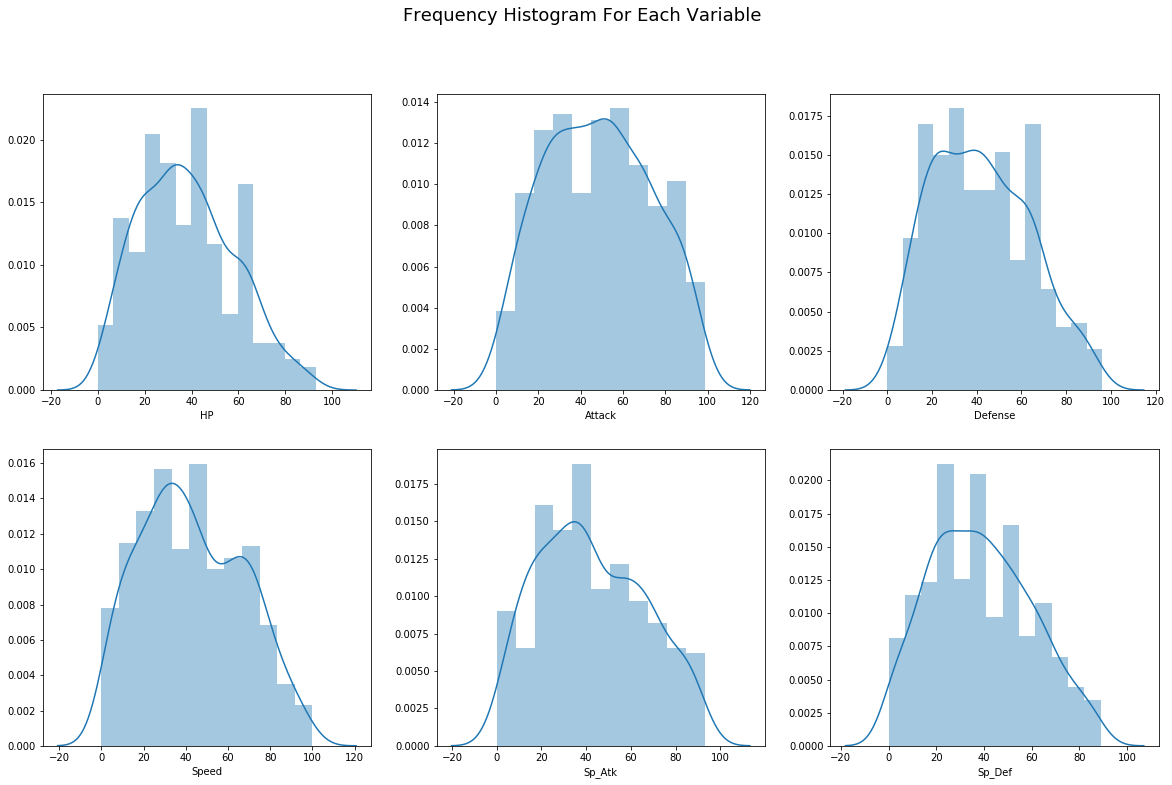

In [7]:
fig, axes = plt.subplots(figsize=(20, 12), nrows=2, ncols=3)
plt.suptitle('Frequency Histogram For Each Variable', fontsize=18, fontweight=400)
for ax, col in zip(axes.ravel(), ['HP', 'Attack', 'Defense', 'Speed', 'Sp_Atk', 'Sp_Def']):
    sns.distplot(df[col], ax=ax)
plt.show()

## Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_normalized = scaler.transform(df)

In [9]:
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [10]:
df_normalized.head()

,Type_1,Total,HP,Attack,Defense,Speed,Sp_Atk,Sp_Def,isLegendary,Egg_Group_1,Height_m,Weight_kg
0,-0.102817,-0.897043,-1.041730,-0.990507,-0.863975,-0.782417,-0.065750,-0.080073,-0.261052,0.778716,-0.585149,-1.042592
1,-0.102817,-0.183831,-0.347839,-0.462255,-0.226338,-0.246884,0.524185,0.532599,-0.261052,0.778716,-0.067648,-0.695279
2,-0.102817,1.184767,0.643433,0.309805,0.593481,0.577014,1.156258,1.286656,-0.261052,0.778716,1.226102,1.290635
3,-0.642605,-1.012700,-1.339111,-0.868603,-1.091703,-0.040909,-0.276441,-0.787001,-0.261052,0.778716,-0.714524,-0.917915
4,-0.642605,-0.183831,-0.446966,-0.380986,-0.454065,0.577014,0.524185,-0.080073,-0.261052,0.778716,0.061727,-0.472643


## K-Means Clustering - The Elbow Method

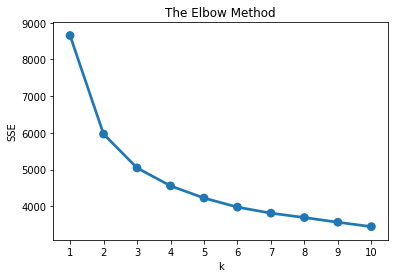

In [11]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [12]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_normalized)
model.labels_.shape

(721,)

In [13]:
df_cluster = df_normalized.copy()
df_cluster['Class'] = model.predict(df_normalized)

In [14]:
df_cluster.head()

,Type_1,Total,HP,Attack,Defense,Speed,Sp_Atk,Sp_Def,isLegendary,Egg_Group_1,Height_m,Weight_kg,Class
0,-0.102817,-0.897043,-1.041730,-0.990507,-0.863975,-0.782417,-0.065750,-0.080073,-0.261052,0.778716,-0.585149,-1.042592,2
1,-0.102817,-0.183831,-0.347839,-0.462255,-0.226338,-0.246884,0.524185,0.532599,-0.261052,0.778716,-0.067648,-0.695279,2
2,-0.102817,1.184767,0.643433,0.309805,0.593481,0.577014,1.156258,1.286656,-0.261052,0.778716,1.226102,1.290635,1
3,-0.642605,-1.012700,-1.339111,-0.868603,-1.091703,-0.040909,-0.276441,-0.787001,-0.261052,0.778716,-0.714524,-0.917915,2
4,-0.642605,-0.183831,-0.446966,-0.380986,-0.454065,0.577014,0.524185,-0.080073,-0.261052,0.778716,0.061727,-0.472643,2


## Visualisasi Clustering 2D

In [15]:
df_atk_def = df_cluster[['Attack','Defense','Class']].sort_values('Class')

In [16]:
df_atk_def['Class'].value_counts()

1    345
2    330
0     46
Name: Class, dtype: int64

In [17]:
def plot_per_cluster(ax, cluster):
    curr_df = df_atk_def[df_atk_def['Class'] == cluster]
    sns.scatterplot(curr_df['Attack'], curr_df['Defense'], size=df_cluster['Attack'], sizes=(20, 300), legend=False)

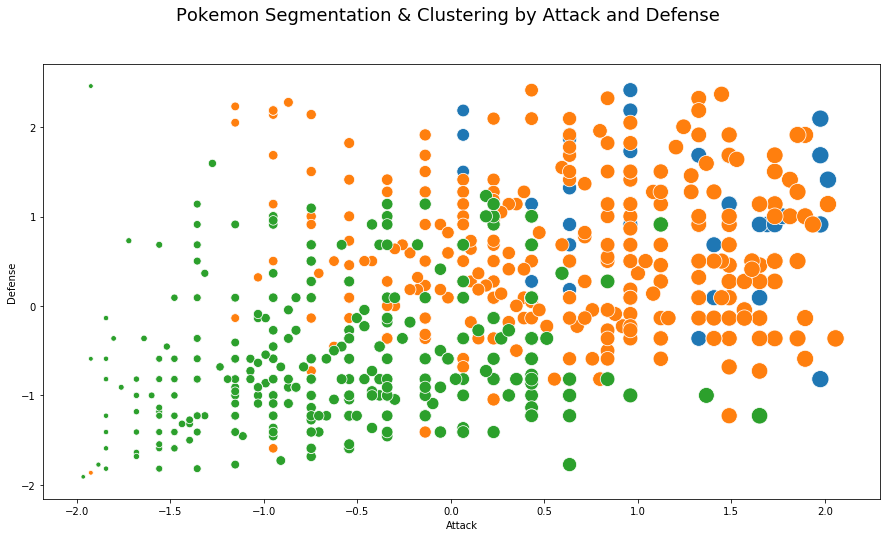

In [18]:
plt.figure(figsize=(15,8))
plt.suptitle('Pokemon Segmentation & Clustering by Attack and Defense', fontsize=18, fontweight=400)
for i in range(3):
    plot_per_cluster(plt.gca(), i)
plt.show()

Dari visualisasi tersebut dapat disimpulkan bahwa pokemon berdasarkan attack dan defense nya dapat dikelompokkan menjadi 3 kelas. Yaitu :
- [x] Kelas dengan attack dan defense rendah
- [x] Kelas dengan attack dan defense normal
- [x] Kelas dengan attack dan defense tinggi

## Clustering Pokemon Height vs Weight

In [19]:
df_wei_hei = df[['Height_m', 'Weight_kg']]

### Normalisasi Data Height vs Weight

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_wei_hei)
df_wei_hei_normal = scaler.transform(df_wei_hei)

### K-Means Elbow Method

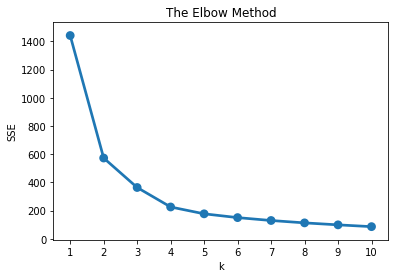

In [43]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_wei_hei_normal)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Visualize Cluster

In [49]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_wei_hei_normal)

df_weihei_copy = pd.DataFrame(df_wei_hei_normal, columns=df_wei_hei.columns)
df_weihei_copy['Class'] = model.predict(df_weihei_copy)

In [56]:
df_weihei_copy['Class'].value_counts()

0    390
1    297
2     34
Name: Class, dtype: int64

In [61]:
def plot_per_cluster(ax, cluster):
    curr_df = df_weihei_copy[df_weihei_copy['Class'] == cluster]
    sns.scatterplot(curr_df['Height_m'], curr_df['Weight_kg'], alpha=0.6, ax=ax)

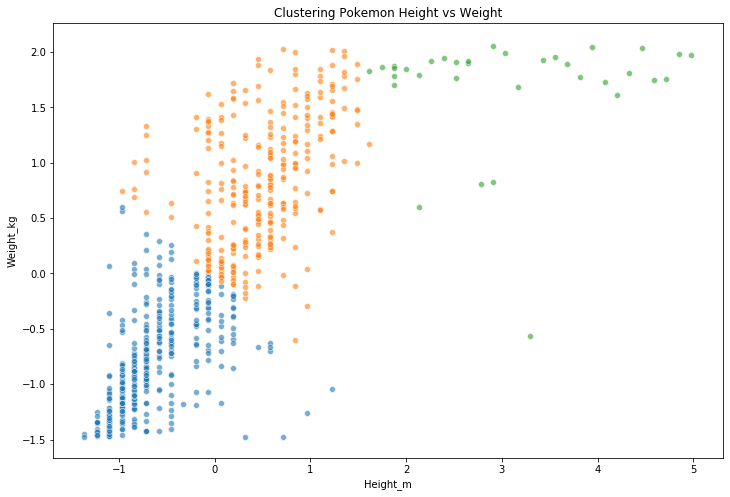

In [62]:
plt.figure(figsize=(12,8))
plt.title('Clustering Pokemon Height vs Weight')
for i in range(3):
    plot_per_cluster(plt.gca(), i)
plt.show()

Berdasarkan height (m) dan weight (kg), pokemon dapat dikelompokkan menjadi 3 kelas, yaitu :
- [x] Pokemon dengan height dan weight rendah
- [x] Pokemon dengan height dan weight normal
- [x] Pokemon dengan height dan weight tinggi

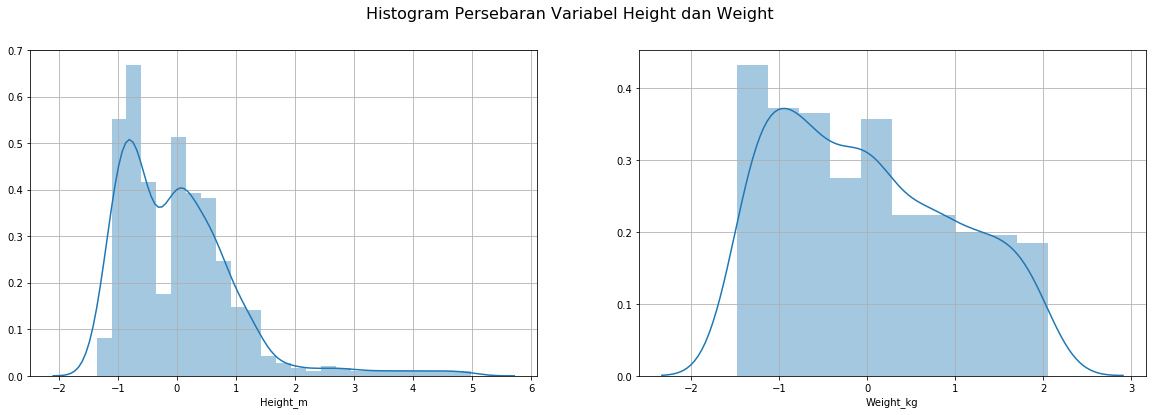

In [80]:
fig, axes = plt.subplots(figsize=(20, 6), nrows=1, ncols=2)
plt.suptitle('Histogram Persebaran Variabel Height dan Weight', fontsize=16, fontweight=500)
axes[0].grid()
axes[1].grid()
sns.distplot(df_weihei_copy['Height_m'], ax=axes[0])
sns.distplot(df_weihei_copy['Weight_kg'], ax=axes[1])
plt.show()